

<h1 align = "center"> <b> Red neuronal de temperatura </b></h2>


In [1]:
# Importacion de librerias

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.optimizers import SGD


In [2]:
# Definicion del conjunto de datos de entrenamiento

x_celsius = np.array((-100, 0, -45, -10, 10, 100, 35, 15, 22, 38), dtype = float)
y_fahrenheit = np.array((-148, 32, -49, 14, 50, 212, 95, 59, 72, 100), dtype = float)


In [3]:
# Visualizacion de Cellsius

x_celsius

array([-100.,    0.,  -45.,  -10.,   10.,  100.,   35.,   15.,   22.,
         38.])

In [4]:
# Visualizacion de Fahrenheit

y_fahrenheit

array([-148.,   32.,  -49.,   14.,   50.,  212.,   95.,   59.,   72.,
        100.])

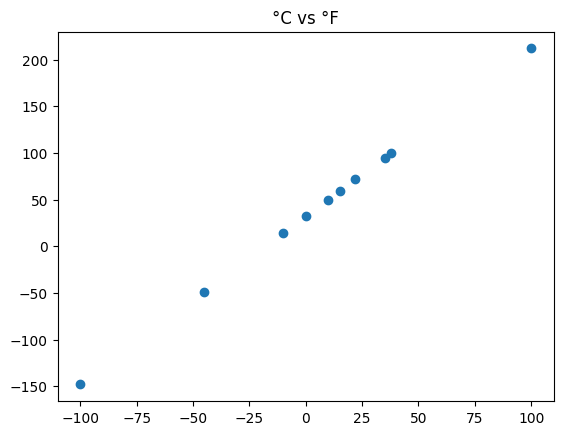

In [5]:
import matplotlib.pyplot as plt

plt.plot(x_celsius, y_fahrenheit, 'o')
plt.title("°C vs °F")
plt.show()

In [6]:
# Definicion de la arquitectura de la red neuronal

modelo = keras.Sequential([
 keras.layers.Dense(units = 1, input_shape= [1], activation = 'linear')

])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Compilacion
from keras.src.engine.training import optimizer

modelo.compile(loss = 'mean_squared_error',
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics = ['mean_squared_error'])

Comenzando entrenamiento...
Modelo entrenado!


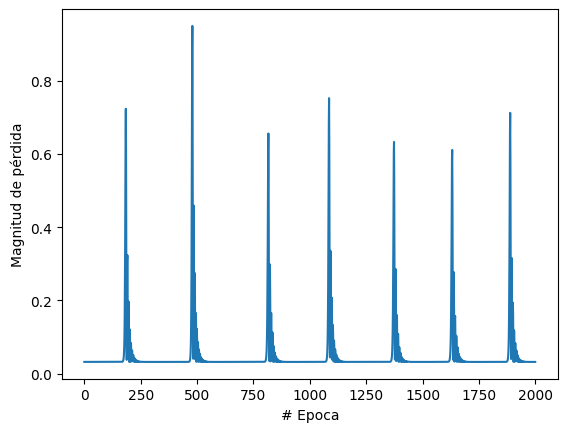

In [15]:
# Entrenando el modelo

print("Comenzando entrenamiento...")
historial = modelo.fit(x_celsius, y_fahrenheit, epochs=2000, verbose=False)
print("Modelo entrenado!")

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [16]:
# Realizando las predicciones

x_test = np.array([-10, 0, 25, 30, 40, 50])
y_predicciones = modelo.predict(x_test)
y_predicciones

1/1 [==============================] - 0s 89ms/step


array([[ 14.004221],
       [ 32.001648],
       [ 76.99522 ],
       [ 85.99393 ],
       [103.991356],
       [121.988785]], dtype=float32)



<h1 align = "center"> <b> Red neuronal "Fashion" </b></h2>



In [ ]:
# Importaciones
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Definir el conjunto de datos de entrenamiento
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

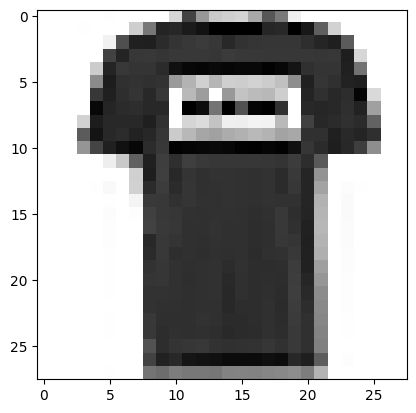

Camiseta
(28, 28)


In [ ]:
# Mostrar una imagen de prueba
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.grid(False)
plt.show()
print(class_names[train_labels[1]])
print(train_images[1].shape)

In [ ]:
# Definir la arquitectura de la Red Neuronal Artificial
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar la imagen de 28x28
    Dense(256, activation='relu'),  # Más neuronas en la capa oculta
    Dropout(0.5),  # Regularización Dropout
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Configurar el proceso de aprendizaje
model.compile(optimizer=Adam(learning_rate=0.0001),  # Tasa de aprendizaje reducida
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])


In [ ]:
# Preparación del conjunto de datos
# Normalizar los valores de píxeles en el rango [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


In [ ]:
# Entrenar la RNA con el conjunto de datos de entrenamiento
history = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 8s 10ms/step - loss: 0.3099 - sparse_categorical_accuracy: 0.8868 - val_loss: 0.3139 - val_sparse_categorical_accuracy: 0.8881
Epoch 2/30
750/750 [==============================] - 7s 9ms/step - loss: 0.3041 - sparse_categorical_accuracy: 0.8896 - val_loss: 0.3173 - val_sparse_categorical_accuracy: 0.8867
Epoch 3/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3003 - sparse_categorical_accuracy: 0.8907 - val_loss: 0.3121 - val_sparse_categorical_accuracy: 0.8855
Epoch 4/30
750/750 [==============================] - 8s 11ms/step - loss: 0.2976 - sparse_categorical_accuracy: 0.8899 - val_loss: 0.3149 - val_sparse_categorical_accuracy: 0.8861
Epoch 5/30
750/750 [==============================] - 7s 9ms/step - loss: 0.2949 - sparse_categorical_accuracy: 0.8921 - val_loss: 0.3077 - val_sparse_categorical_accuracy: 0.8885
Epoch 6/30
750/750 [==============================] - 7s 10ms/step - loss: 0.2902 - sparse_catego

In [ ]:
# Validación con el conjunto de datos de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

313/313 - 1s - loss: 0.3255 - sparse_categorical_accuracy: 0.8886 - 844ms/epoch - 3ms/step
Precisión en el conjunto de prueba: 0.8885999917984009


In [ ]:
# Predicción con la imagen de prueba proporcionada
example_image = train_images[1]  # Usamos la imagen de prueba proporcionada
example_image = np.expand_dims(example_image, axis=0)  # Agregamos una dimensión extra para que coincida con la forma de entrada
prediction = model.predict(example_image)
predicted_class = np.argmax(prediction)

1/1 [==============================] - 0s 53ms/step


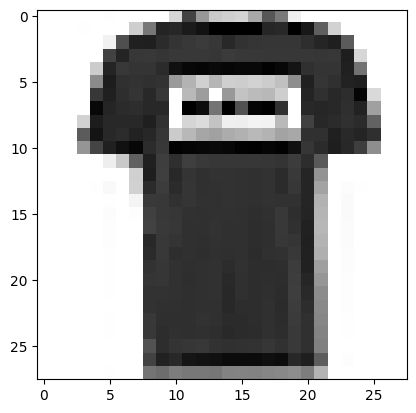

In [ ]:
# Mostrar la imagen de prueba
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [ ]:
# Imprimir la predicción y la etiqueta verdadera
print(f'Clase predicha para la imagen de prueba: {class_names[predicted_class]}')
print(f'Etiqueta verdadera para la imagen de prueba: {class_names[train_labels[1]]}')

Clase predicha para la imagen de prueba: Camiseta
Etiqueta verdadera para la imagen de prueba: Camiseta
